In [48]:
import numpy as np
import random

# customers
class Customer:
    
    def __init__(self, number, arrival_time, queue_time = 0, service_time = 6, auto_service = False):
        self.number = number
        self.arrival_time = arrival_time
        self.queue_time = queue_time
        self.service_time = int(np.random.poisson(service_time, 1))
        if(random.randint(1,101) < 26):
            self.auto_service = True
            self.service_time = int(np.random.poisson(3, 1))
            


In [49]:
def simulate(queue_times, service_times, system_times):
    t=0
    queue = []
    tot_arr = 0
    show_up= True
    customer_number = 1
    served_customers = []
    
    # initialize servers
    cashier1_available = True
    cashier1_time_remaining = 0
    cashier2_available = True
    cashier2_time_remaining = 0
    self1_available = True
    self1_time_remaining = 0
    self2_available = True
    self2_time_remaining = 0


    while t < 720: # while store is open (minutes/day)

        if show_up == True: # create inter arrival times
            at = int(np.random.poisson(3, 1)) + 1
            tot_arr += at
            show_up = False


        if t == tot_arr: # make new customers join the queue
            queue.append(Customer(customer_number, at))
            show_up = True
            customer_number += 1

        # Cashiers
            
        if cashier1_available and queue: #make queued customer join cashier 1
            served_customers.append(queue.pop(0))
            cashier1_available = False
            cashier1_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        cashier1_time_remaining -= 1

        if cashier1_time_remaining == 0: #open cashier 1 when customer leaves
            cashier1_available = True

        if cashier2_available and queue: #make queued customer join cashier 2
            served_customers.append(queue.pop(0))
            cashier2_available = False
            cashier2_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        cashier2_time_remaining -= 1

        if cashier2_time_remaining == 0: #open cashier 2 when customer leaves
            cashier2_available = True
        
        # Self Checkouts
        
        self1_auto_candidate = 0

        for customer in queue:
            
            if self1_available and queue and auto_service: #make queued customer join self 1
                served_customers.append(queue.pop(self1_auto_candidate))
                self1_available = False
                self1_time_remaining = served_customers[len(served_customers)-1].service_time + 1
                
            self1_auto_candidate += 1

        self1_time_remaining -= 1

        if self1_time_remaining == 0: #open self 1 when customer leaves
                self1_available = True
        
        self2_auto_candidate = 0

        for customer in queue:
            
            if self2_available and queue and auto_service: #make queued customer join self 2
                served_customers.append(queue.pop(self2_auto_candidate))
                self2_available = False
                self2_time_remaining = served_customers[len(served_customers)-1].service_time + 1
                
            self2_auto_candidate += 1

        self2_time_remaining -= 1

        if self2_time_remaining == 0: #open self 2 when customer leaves
                self2_available = True
        
        t += 1

        if queue: # add 1 minute waiting time to each customer per loop iteration
            for customer in queue:
                customer.queue_time += 1

    for customer in served_customers: # append all data to analyze later
        queue_times.append(customer.queue_time)
        service_times.append(customer.service_time)
        system_times.append(customer.queue_time + customer.service_time)
           

In [50]:
queue_times = []
service_times = []
system_times = []
auto_service = []

for i in range(1000): # how many times to run simulation
    simulate(queue_times, service_times, system_times)

(array([1.07550661e+00, 1.65809155e-01, 0.00000000e+00, 1.37070313e-01,
        0.00000000e+00, 1.05924534e-01, 7.56067410e-02, 0.00000000e+00,
        5.33666325e-02, 0.00000000e+00, 3.54686405e-02, 0.00000000e+00,
        2.49551347e-02, 1.65212234e-02, 0.00000000e+00, 1.12837260e-02,
        0.00000000e+00, 7.26895319e-03, 4.80424853e-03, 0.00000000e+00,
        3.46599093e-03, 0.00000000e+00, 2.49358792e-03, 0.00000000e+00,
        1.55969592e-03, 8.95380989e-04, 0.00000000e+00, 7.60592453e-04,
        0.00000000e+00, 3.75482350e-04, 0.00000000e+00, 4.04365608e-04,
        1.15533031e-04, 0.00000000e+00, 1.05905278e-04, 0.00000000e+00,
        1.05905278e-04, 6.73942680e-05, 0.00000000e+00, 3.85110103e-05,
        0.00000000e+00, 3.85110103e-05, 0.00000000e+00, 4.81387629e-05,
        3.85110103e-05, 0.00000000e+00, 1.92555051e-05, 0.00000000e+00,
        0.00000000e+00, 1.92555051e-05]),
 array([ 0.  ,  0.58,  1.16,  1.74,  2.32,  2.9 ,  3.48,  4.06,  4.64,
         5.22,  5.8 ,  

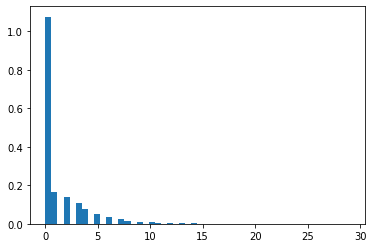

In [51]:
import matplotlib.pyplot as plt

plt.hist(queue_times, bins = 50, density=True)

(array([3.76338714e-02, 0.00000000e+00, 1.27611300e-01, 0.00000000e+00,
        0.00000000e+00, 2.32768654e-01, 0.00000000e+00, 3.23789427e-01,
        0.00000000e+00, 0.00000000e+00, 3.71621622e-01, 0.00000000e+00,
        0.00000000e+00, 3.85478998e-01, 0.00000000e+00, 3.49197066e-01,
        0.00000000e+00, 0.00000000e+00, 2.87110730e-01, 0.00000000e+00,
        0.00000000e+00, 2.10388183e-01, 0.00000000e+00, 1.39352597e-01,
        0.00000000e+00, 0.00000000e+00, 8.19245736e-02, 0.00000000e+00,
        4.43788721e-02, 0.00000000e+00, 0.00000000e+00, 2.28507106e-02,
        0.00000000e+00, 0.00000000e+00, 1.02424086e-02, 0.00000000e+00,
        4.62892209e-03, 0.00000000e+00, 0.00000000e+00, 1.63114398e-03,
        0.00000000e+00, 0.00000000e+00, 6.17189612e-04, 0.00000000e+00,
        2.35119852e-04, 0.00000000e+00, 0.00000000e+00, 8.81699446e-05,
        0.00000000e+00, 2.93899815e-05]),
 array([ 0.  ,  0.38,  0.76,  1.14,  1.52,  1.9 ,  2.28,  2.66,  3.04,
         3.42,  3.8 ,  

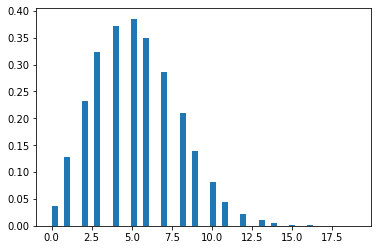

In [52]:
plt.hist(service_times, bins = 50, density=True)

(array([1.24246147e-02, 4.33930832e-02, 8.43896583e-02, 0.00000000e+00,
        1.25169074e-01, 1.53919415e-01, 1.71284404e-01, 0.00000000e+00,
        1.68562157e-01, 1.53942682e-01, 0.00000000e+00, 1.27961122e-01,
        1.00537004e-01, 7.38264091e-02, 0.00000000e+00, 5.42665599e-02,
        3.76926513e-02, 0.00000000e+00, 2.65322140e-02, 1.77915519e-02,
        1.22772566e-02, 0.00000000e+00, 8.12796267e-03, 4.94812995e-03,
        0.00000000e+00, 3.80028789e-03, 2.76102549e-03, 1.72176309e-03,
        0.00000000e+00, 1.16335344e-03, 8.37614474e-04, 5.19631201e-04,
        0.00000000e+00, 3.41250341e-04, 1.93892239e-04, 0.00000000e+00,
        1.24091033e-04, 1.16335344e-04, 6.98012062e-05, 0.00000000e+00,
        3.10227583e-05, 4.65341374e-05, 0.00000000e+00, 1.55113791e-05,
        3.87784479e-05, 1.55113791e-05, 0.00000000e+00, 2.32670687e-05,
        7.75568957e-06, 1.55113791e-05]),
 array([ 0.  ,  0.72,  1.44,  2.16,  2.88,  3.6 ,  4.32,  5.04,  5.76,
         6.48,  7.2 ,  

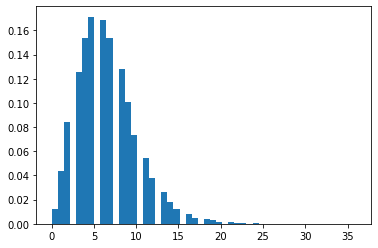

In [53]:
plt.hist(system_times, bins = 50, density=True)

In [54]:
over_time_limit = []
for i in system_times:
    if i > 10:
        over_time_limit.append(i)

len(over_time_limit)/len(system_times)

0.12490507035961582